c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
C:\Users\syxxm\AppData\Local\Temp\ipykernel_46968\2237314726.py:52: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.rugplot(subset[0], ax=g.ax_marg_y, color=ordered_colors[i], height=1, alpha=0.6, vertical=True)
C:\Users\syxxm\AppData\Local\Temp\ipykernel_46968\2237314726.py:52: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.rugplot(subset[0], ax=g.ax_marg_y, color=ordered_colors[i], height=1, alpha=0.6, vertical=True)
C:\Users\syxxm\AppData\Local\Temp\ipykernel_46968\2237314726.py:52: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
Th

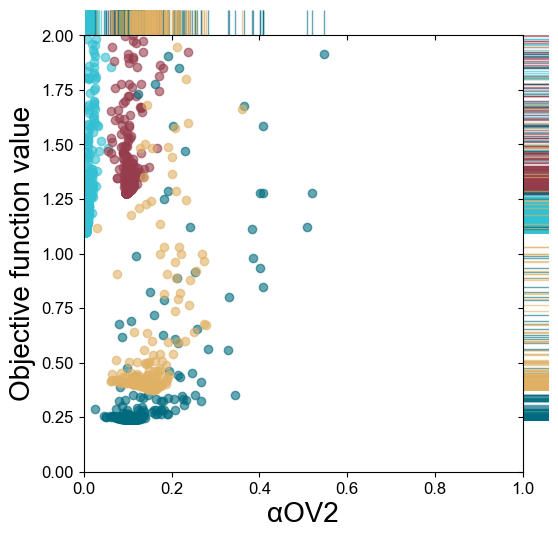

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
C:\Users\syxxm\AppData\Local\Temp\ipykernel_46968\2237314726.py:52: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.rugplot(subset[0], ax=g.ax_marg_y, color=ordered_colors[i], height=1, alpha=0.6, vertical=True)
C:\Users\syxxm\AppData\Local\Temp\ipykernel_46968\2237314726.py:52: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.rugplot(subset[0], ax=g.ax_marg_y, color=ordered_colors[i], height=1, alpha=0.6, vertical=True)
C:\Users\syxxm\AppData\Local\Temp\ipykernel_46968\2237314726.py:52: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
Th

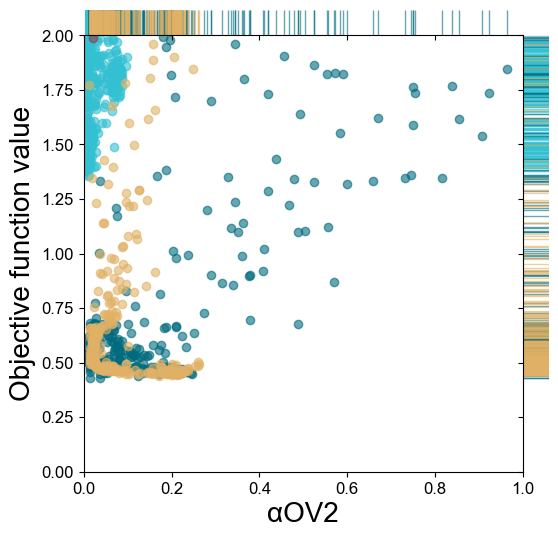

In [1]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 设定工作目录
os.chdir('D:/OneDrive/Document/00 Article related/Code0819/13/Data')

# 定义原始颜色系列
colors = ['#106EA0', '#006B7E', '#32C0D2', '#E0B165', '#963C4C']

# 定义顺序，注意Python索引从0开始，所以需要将所有数减1
order = [2, 4, 1, 3, 0]

# 根据顺序重排颜色序列
ordered_colors = [colors[i] for i in order]

# 定义num列表
num = ['N13302500', 'N13302500_0']

# 只保留of小于2的点
maxOF = 2

# 遍历num中的每个元素
for n in num:
    # 生成该num对应的所有picturename1
    picturename1_list = [f"{n}_{i}" for i in range(1, 5)]

    # 初始化用于存储所有数据点的DataFrame
    all_data = pd.DataFrame()

    # 遍历每个picturename1，将数据添加到all_data DataFrame中
    for pname in picturename1_list:
        file_path = f"../Data/{pname}.txt"
        data = pd.read_csv(file_path, sep=r"\s+", header=None)
        data = data[data[0] < maxOF]
        if len(data) > 500:
            data = data.sample(500)
        data['pname'] = pname  # 添加一个列来标识数据来源
        all_data = pd.concat([all_data, data])

    # 使用JointGrid绘制自定义图表
    g = sns.JointGrid(data=all_data, x=all_data[2], y=all_data[0], space=0, ratio=17)

    # 为每个pname绘制散点图
    for i, pname in enumerate(picturename1_list):
        subset = all_data[all_data['pname'] == pname]
        g.ax_joint.scatter(subset[2], subset[0], color=ordered_colors[i], alpha=0.6)

        # 为每个pname绘制边缘图
        sns.rugplot(subset[2], ax=g.ax_marg_x, color=ordered_colors[i], height=1, alpha=0.6)
        sns.rugplot(subset[0], ax=g.ax_marg_y, color=ordered_colors[i], height=1, alpha=0.6, vertical=True)

    # 设置坐标轴名称和属性
    g.ax_joint.set_xlabel('αOV2', fontsize=20, fontname='Arial')
    g.ax_joint.set_ylabel('Objective function value', fontsize=20, fontname='Arial')

    # 设置坐标轴范围
    g.ax_joint.set_xlim(0, 1)
    g.ax_joint.set_ylim(0, 2)

    # 设置坐标轴刻度值字体和大小
    g.ax_joint.tick_params(axis='x', labelsize=12)
    g.ax_joint.tick_params(axis='y', labelsize=12)

    # 设置刻度标签的字体
    for label in g.ax_joint.get_xticklabels():
        label.set_fontname('Arial')
    for label in g.ax_joint.get_yticklabels():
        label.set_fontname('Arial')

    # 保存图表
    outputname = f"Output/{n}_scatterplot.png"  # 假设输出文件夹位于Data文件夹同级的Output文件夹中
    g.savefig(outputname, dpi=800)

    # 显示图表
    plt.show()
